<a href="https://colab.research.google.com/github/ShreePurvaja/Data-Science-Notes/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08.04.2025

In [57]:
# New dataset
import kagglehub


# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")


print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


In [58]:
import pandas as pd
df=pd.read_csv(r"/root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1/loan_data.csv")
df


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [59]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['person_home_ownership','person_gender', 'person_education','loan_intent','previous_loan_defaults_on_file']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [60]:
#Random Forest -
#ensemble methods
#1.bagging - more decision trees together for random forest(RF)
#2.boosting -

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# Splitting the data
y = df['loan_status']

x = df.drop("loan_status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [61]:
from sklearn.ensemble import RandomForestClassifier
# Training the model
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

# Making predictions
y_pred=rf.predict(X_test)


In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.924


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6984
           1       0.89      0.75      0.82      2016

    accuracy                           0.92      9000
   macro avg       0.91      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



[[6805  179]
 [ 505 1511]]


In [63]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
# Define hyperparameter grid for tuning
param_grid = {  #param_distributions(may be changed)
   'criterion': ['gini', 'entropy','log_loss'],
   'max_depth': [5, 10, 15, None],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}
# 1. **Grid Search CV** (Exhaustive Search for Best Hyperparameters)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Get the best parameters
print("Best parameters from Grid Search CV:", grid_search.best_params_)
print("Best accuracy from Grid Search CV:", grid_search.best_score_)
# Train with best parameters
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)
# Performance Metrics
print("\nGrid Search CV Classification Report:\n", classification_report(y_test, y_pred_grid))


Best parameters from Grid Search CV: {'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy from Grid Search CV: 0.9273888888888889

Grid Search CV Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      6984
           1       0.90      0.76      0.83      2016

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



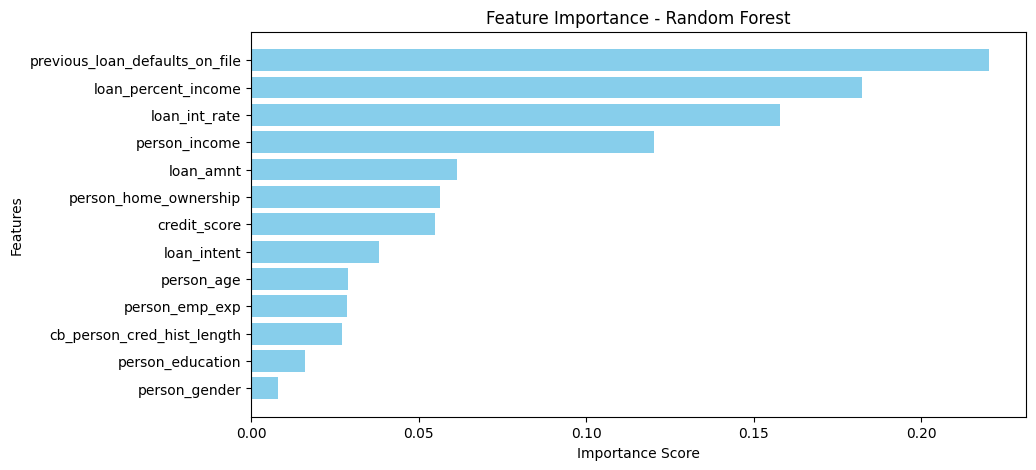

In [32]:
import matplotlib.pyplot as plt
# Get feature importance
feature_importances = rf.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [33]:
print(feature_importance_df)

                           Feature  Importance
12  previous_loan_defaults_on_file    0.220314
9              loan_percent_income    0.182306
8                    loan_int_rate    0.157979
3                    person_income    0.120228
6                        loan_amnt    0.061586
5            person_home_ownership    0.056252
11                    credit_score    0.054744
7                      loan_intent    0.038068
0                       person_age    0.028841
4                   person_emp_exp    0.028483
10      cb_person_cred_hist_length    0.027094
2                 person_education    0.016152
1                    person_gender    0.007954


In [46]:
#diabetes dataset
import pandas as pd
dia=pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/diabetes.csv")
dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [39]:
from sklearn.model_selection import train_test_split
x=dia[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=dia['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier
# Training the model
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

# Making predictions
y_pred=rf.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.7532467532467533


              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



[[81 18]
 [20 35]]


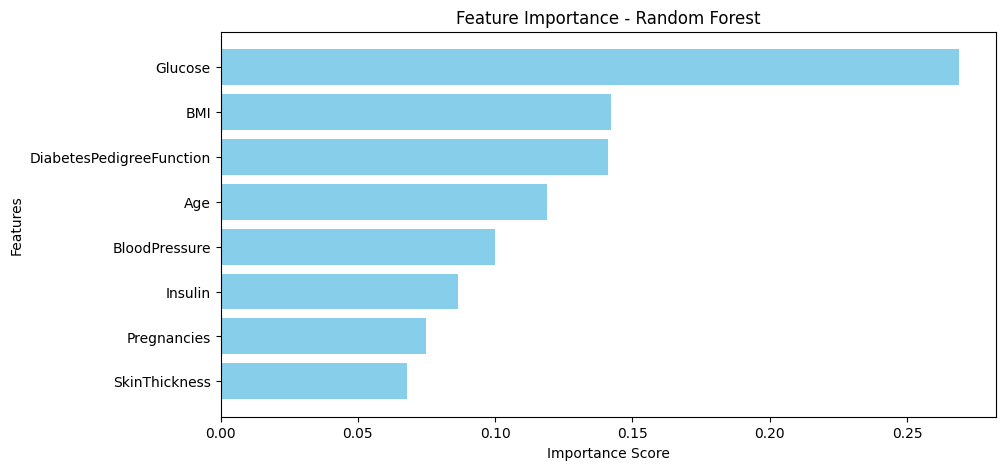

In [42]:
import matplotlib.pyplot as plt
# Get feature importance
feature_importances = rf.feature_importances_

# Convert to DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [43]:
print(feature_importance_df)

                    Feature  Importance
1                   Glucose    0.268753
5                       BMI    0.142219
6  DiabetesPedigreeFunction    0.141017
7                       Age    0.118854
2             BloodPressure    0.100027
4                   Insulin    0.086357
0               Pregnancies    0.074784
3             SkinThickness    0.067987
